# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [698]:
# Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [699]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [700]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/data/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

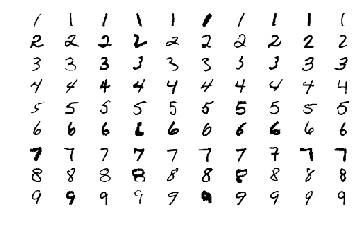

In [701]:
#def P1(num_examples=10):

### STUDENT START ###
def P1(num_examples=10):
    
    #Defining a variable to hold the place of the plot on the subplot
    place = 1
    for row in range(1,10):
        #Detrmine the digit we want to show
        YDigit = (Y==row).nonzero()[0]

        for col in range(1,num_examples+1):
            #Randomly select one of the rows of this digit to display
            index = YDigit[np.random.randint(0,100)]

            #Store the row to be plotted and reshape it for display
            rowToPlot = (X[index]*255).reshape((28,28))

            #Add and show the plot
            fig = plt.subplot(10,num_examples, place)
            place = place + 1
            fig.axis('off')
            plt.imshow(rowToPlot, cmap='Greys')

#Call the main method        
P1(10)
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [702]:
#def P2(k_values):

### STUDENT START ###
def P2(K_values):
    #For each value of K, iterate to generate the model and print the classification report
    for knn in K_values:
        model = KNeighborsClassifier(n_neighbors=knn)
        model.fit(mini_train_data, mini_train_labels)
        print("The value of K: "+ str(knn))
        print(classification_report(dev_labels, model.predict(dev_data)))    

#Call the main mehtod
P2(range(1,10,2))

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

The value of K: 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

The value of K: 3
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
        4.0       0.88      0.85      0.86       104
      

ANSWER: The digit 9 seems to be the hardest as the f1-score seems to be worst in most cases. The next digit that seems to be difficult is 3.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [703]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
def P3(train_sizes, accuracies):
    from sklearn.metrics import accuracy_score

    #Iterate for each of the training sizes passed into the function
    for size in train_sizes:
        #Create a subset based on the size
        subset_train_data, subset_train_label = train_data[0:size], train_labels[0:size]
        
        #Generate and fit the model
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(subset_train_data, subset_train_label)

        #Run the prediction and use the in-built time function to calculate the execution time
        dev_predicted = %time model.predict(dev_data)

        #Calculate and print the accuracy
        acc = accuracy_score(dev_labels, dev_predicted)
        print ("Accuracy when the size is: "+str(size)+" is "+str(acc))
        accuracies.append(acc)

#Call the main function after setting the correct inputs        
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

print(accuracies)

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

CPU times: user 131 ms, sys: 2.63 ms, total: 134 ms
Wall time: 134 ms
Accuracy when the size is: 100 is 0.72
CPU times: user 261 ms, sys: 4.53 ms, total: 266 ms
Wall time: 264 ms
Accuracy when the size is: 200 is 0.786
CPU times: user 533 ms, sys: 5.91 ms, total: 539 ms
Wall time: 543 ms
Accuracy when the size is: 400 is 0.841
CPU times: user 1.1 s, sys: 8.96 ms, total: 1.11 s
Wall time: 1.13 s
Accuracy when the size is: 800 is 0.884
CPU times: user 2.11 s, sys: 14.5 ms, total: 2.12 s
Wall time: 2.13 s
Accuracy when the size is: 1600 is 0.902
CPU times: user 4.36 s, sys: 39.5 ms, total: 4.4 s
Wall time: 4.48 s
Accuracy when the size is: 3200 is 0.926
CPU times: user 8.67 s, sys: 70.9 ms, total: 8.74 s
Wall time: 8.89 s
Accuracy when the size is: 6400 is 0.937
CPU times: user 18.5 s, sys: 160 ms, total: 18.7 s
Wall time: 19 s
Accuracy when the size is: 12800 is 0.959
CPU times: user 37 s, sys: 359 ms, total: 37.4 s
Wall time: 38.4 s
Accuracy when the size is: 25000 is 0.97
[0.7199999999

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [714]:
#def P4():

### STUDENT START ###
def P4():
    #We will use the accuracies and train from P3
    lm = LinearRegression()
    lm.fit(np.array(train_sizes).reshape(-1, 1), accuracies)
    prediction_accuracy = lm.predict(np.array([60000]).reshape(1,-1))
    print("Prediction accuracy for size 60000 is %1.1f" %prediction_accuracy)    
    
    #Let's apply a log transformation to the train_sizes so that the increases 
    #in the training sizes have more of an exponential effect on the accuracy and not a linear effect
    lm.fit(np.array(np.log(train_sizes)).reshape(-1, 1), accuracies)
    prediction_accuracy = lm.predict(np.array([np.log(60000)]).reshape(1,-1))
    print("Prediction accuracy for size 60000 with log transformation is %1.1f" %prediction_accuracy)    

    
P4()

### STUDENT END ###

#P4()

Prediction accuracy for size 60000 is 1.2
Prediction accuracy for size 60000 with log transformation is 1.0


ANSWER: The prediction accuracy is 1.2. Which is is incorrect, since it cannot be more than 1.0. This is happening because the regression is assuming a linear relationship between the training size and accuracy. There is a sort of  exponential relationship instead. Applying a log(train_size) will create that desired effect.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix: 
[[105   0   0   0   0   0   0   0   0]
 [  4  81   4   0   0   0   4   3   2]
 [  0   0  75   0   3   0   3   1   3]
 [  2   0   0  85   0   3   0   0  14]
 [  0   0   9   0  76   0   1   1   2]
 [  1   1   0   1   0  94   0   0   0]
 [  4   0   1   1   0   0 104   0   2]
 [  2   0   5   0   2   1   0  84   2]
 [  0   0   3   9   1   0   5   0  87]]
Most confused digit is 9


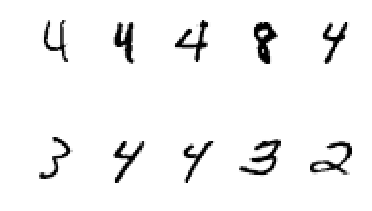

In [705]:
#def P5():

### STUDENT START ###
def P5():
    #Let's create a KNN model
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    
    #Running our prediction on dev_data as asked
    predicted_labels = model.predict(dev_data)

    #Let's output the confusion matrix
    from sklearn.metrics import confusion_matrix
    matrix = confusion_matrix(dev_labels, predicted_labels, labels = range(1,10))
    print ("Confusion Matrix: \n"+str(matrix))
    
    #Analysis of the confusion yields that the most confused digit is 9, 
    #and that it is most confused with digit 4 (14 times it got confused)
    error_count = matrix.sum(axis=0) - matrix.max(axis=0)
    mostConfusedDigit = error_count.argmax()+1
    print("Most confused digit is %i" %mostConfusedDigit)
    
    #Let's print some examples of the most confused digit when it got the prediction wrong
    error_list = ((predicted_labels == mostConfusedDigit) & (predicted_labels != dev_labels)).nonzero()[0]
    for i in range(1,11):
        index = error_list[i]
        rowToPlot = (dev_data[index]*255).reshape((28,28))
        fig = plt.subplot(2,5, i)
        fig.axis('off')
        plt.imshow(rowToPlot, cmap='Greys')

#Call the main function        
P5()


### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Scenario 1: preprocess the training data but not the dev data
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.95      0.99      0.97       105
        2.0       0.97      0.84      0.90       102
        3.0       0.80      0.87      0.83        86
        4.0       0.92      0.82      0.87       104
        5.0       0.93      0.89      0.91        91
        6.0       0.96      0.96      0.96        98
        7.0       0.91      0.93      0.92       113
        8.0       0.93      0.93      0.93        96
        9.0       0.82      0.88      0.85       106

avg / total       0.91      0.91      0.91      1000

Scenario 2: preprocess the dev data but not the training data
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.75      0.99      0.86       105
        2.0       0.99      0.81      0.89       102
        3.0       0.77  

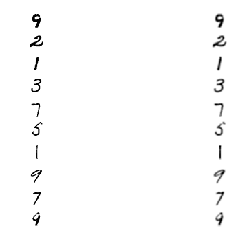

In [706]:
#def P6():
    
### STUDENT START ###
def blurr_image(orig_img):
    #This function actually blurrs the image and gets the original image as an input
    #Let's start by creating an empty array
    blurr_image = np.empty((28,28))
    blurr_image.fill(1)

    #We will use a technique a[0:3, 0:3] for example to create a 3X3 grid and call a sum on
    #the entire matrix and then divide by 9. We will have to take care of the edge cases so
    #we will modify start_row/end_row and start_col/end_col to account for that. Let's begin!

    i, j = orig_img.shape
    start_row=None
    for row in range(0,i):
        #Logic to adjust the row for the edge cases
        if row != 0:
            start_row = row - 1
        if row < i-2:
            end_row = row+2 
        else:
            end_row=None

        start_col=None
        for col in range (0,j):
            #Logic to adjust the col for the edge cases
            if col != 0:
                start_col = col -1 

            if col < j-2:
                end_col = col+2
            else:
                end_col=None
            end_col
            
            #We are ready to recalculate the new value of the pixel
            blurr_image[row,col] = orig_img[start_row:end_row,start_col:end_col].sum()/9
    
    return blurr_image

def transform_data(orig_data):
    #A new method that gets a full data for which each row has to be transformed by the blurr image method
    #Let's start by creating an empty array
    new_data = np.empty((len(orig_data),784))

    #For each row we will call blurr_image function
    for index in range(0, len(orig_data)):
        new_image = blurr_image(orig_data[index].reshape(28,28))
        new_data[index] = new_image.reshape(1,784)
    
    #We are ready to return the transformed data set
    return new_data
    
def P6():
    #Scenario 1: preprocess the training data but not the dev data
    new_mini_train_data = transform_data(mini_train_data)

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(new_mini_train_data, mini_train_labels)
    predicted_labels = model.predict(dev_data)
    print("Scenario 1: preprocess the training data but not the dev data\n"+
          classification_report(dev_labels, predicted_labels))   
    
    #Scenario 2: preprocess the dev data but not the training data
    new_dev_data = transform_data(dev_data)

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    predicted_labels = model.predict(new_dev_data)
    print("Scenario 2: preprocess the dev data but not the training data\n"+
          classification_report(dev_labels, predicted_labels))   
    
    #Scenario 3: preprocess both training and dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(new_mini_train_data, mini_train_labels)
    predicted_labels = model.predict(new_dev_data)
    print("Scenario 3: preprocess both training and dev data\n"+
          classification_report(dev_labels, predicted_labels))   
    
    #Printing samples to see the blurr effect
    for i in range(1,20,2):
        fig = plt.subplot(10,2,i)
        fig.axis('off')
        plt.imshow(mini_train_data[i].reshape(28,28), cmap='Greys')

        fig = plt.subplot(10,2,i+1)
        fig.axis('off')
        plt.imshow(new_mini_train_data[i].reshape(28,28), cmap='Greys')

P6()

### STUDENT END ###

#P6()

ANSWER: The blurr effect increased the accuracy of the results. Further pre processing the training data seemed to do the trick not neededing the dev data to be transformed (atleast in these runs).

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [707]:
#def P7():

### STUDENT START ###
def P7():
    #Creating a BernoulliNB model using the bianrize argument
    from sklearn.naive_bayes import BernoulliNB
    model = BernoulliNB(binarize=0.5)
    model.fit(mini_train_data, mini_train_labels)
    predicted_values = model.predict(dev_data)
    
    #Check accuracy of the prediction
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(dev_labels, predicted_values)
    print ("Accuracy for BernoulliNB with 1/0 value is: "+str(acc))   
    
    #Now mapping the pixel values to 0, 1, or 2, representing white, grey, or black
    threshold = 0.75
    new2_mini_train_data = mini_train_data.copy()
    new2_mini_train_data[new2_mini_train_data >= threshold] = 2
    new2_mini_train_data[new2_mini_train_data < threshold] = 1
    new2_mini_train_data[new2_mini_train_data <= (1-threshold)] = 0
    
    new2_dev_data = dev_data.copy()
    new2_dev_data[new2_dev_data >= threshold] = 2
    new2_dev_data[new2_dev_data < threshold] = 1
    new2_dev_data[new2_dev_data <= (1-threshold)] = 0
    
    #Creating a MultinomialNB model
    from sklearn.naive_bayes import MultinomialNB
    model = MultinomialNB()
    model.fit(new2_mini_train_data, mini_train_labels)
    predicted2_values = model.predict(new2_dev_data)
    
    #Check accuracy of the prediction
    from sklearn.metrics import accuracy_score
    acc2 = accuracy_score(dev_labels, predicted2_values)
    print ("Accuracy for MultinomialNB when we categorize in 0,1 and 2 is: "+str(acc2))

P7()
### STUDENT END ###

#P7()

Accuracy for BernoulliNB with 1/0 value is: 0.815
Accuracy for MultinomialNB when we categorize in 0,1 and 2 is: 0.791


ANSWER: The multi-class actually did NOT do better. Possibly because the probabilities got further spread out and started causing accuracy issues.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [708]:
#def P8(alphas):

### STUDENT START ###
def P8(alphas):

    #Create a BernoulliNB model
    from sklearn.naive_bayes import BernoulliNB
    model = BernoulliNB()

    #Find the optimal alpha value
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=alphas)
    grid.fit(mini_train_data, mini_train_labels)

    return grid

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
grid = P8(alphas)
# summarize the results of the grid search
print("Best score is %.4f " %grid.best_score_)
print("Best value for alhpa is " + str(grid.best_estimator_))


alphas = {'alpha': [0.0]}
grid = P8(alphas)
print("Best score with alpha = 0 is %.4f " %grid.best_score_)


### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best score is 0.8210 
Best value for alhpa is BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)
Best score with alpha = 0 is 0.8030 


/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/vishal/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [709]:
#print nb.best_params_

ANSWER: The best value for alpha is 0.1
The accuracy when alpha is 0 is 0.80 I was expecting a worse value so this is a surprise.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [710]:
#def P9():

### STUDENT END ###
def P9():
    #Let's create a model and fit to the training data
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(train_data, train_labels)

    #Let's run a prediction on dev data
    predicted_value = model.predict(dev_data)

    #Let's find the accuracy of the prediction
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(dev_labels, predicted_value)
    print("Accuracy of the GuassianNB is "+str(acc))
    #print("Theta "+str(model.theta_[model.theta_.nonzero()]))
    #print("Sigma "+str(model.sigma_[model.theta_.nonzero()]))    
    
    #The distribution is highly bi-modal with values concentrated on the two ends of the spectrum
    #We need to find a way to normalize the distribution
    new_train_data = train_data.copy()
    new_dev_data = dev_data.copy()
    
    nonZeroIndex = new_train_data != 0
    new_train_data[nonZeroIndex] = np.log10(new_train_data[nonZeroIndex]*255)    

    nonZeroIndex = new_dev_data != 0
    new_dev_data[nonZeroIndex] = np.log10(new_dev_data[nonZeroIndex]*255)
    
    from sklearn.naive_bayes import GaussianNB
    model2 = GaussianNB()
    model2.fit(new_train_data, train_labels)

    #Let's run a prediction on dev data
    predicted2_value = model.predict(new_dev_data)

    #Let's find the accuracy of the prediction
    acc2 = accuracy_score(dev_labels, predicted2_value)
    print("Accuracy of the GuassianNB after log10 normalization is "+str(acc2))
    
P9()

### STUDENT END ###

#gnb = P9()

Accuracy of the GuassianNB is 0.571
Accuracy of the GuassianNB after log10 normalization is 0.715


ANSWER: The distribution is bi-modal with concentration on both the ends of the spectrum. To normalize the distribution we go back to the original values by multiplying by 255 and then taking a log. After some trial and error, seems like log10 provides the best accuracy at 0.715 (from 0.571) on dev data

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

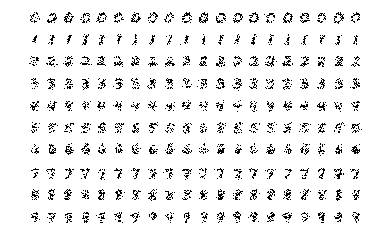

In [711]:
#def P10(num_examples):

### STUDENT START ###
def generateDigit(digit, model):
    #Let's start with creating an empty image grid
    import random
    new_row=np.empty((28,28))

    #Now we will iterate the matrix and populate 1 and 0 based on pixel probabilities for a specific digit
    pos=0
    for row in range (0,28):
        for col in range (0,28):
            #np.random.rand will be altered to the probability for a specific pixel of a specific digit
            new_row[row,col] = 1 if np.random.rand() < np.exp(model.feature_log_prob_[digit-1,pos]) else 0
            pos = pos+1

    #return the created image
    return new_row
    
def P10(num_examples):
    #Let's create a BernoulliNB model
    from sklearn.naive_bayes import BernoulliNB
    model = BernoulliNB(binarize=0.5)
    model.fit(train_data, train_labels)
    
    #Let's start a for loop to generate digits and show the plot
    place = 1
    for digit in range (1,11):
        for col in range (1,num_examples+1):
            rowToPlot = generateDigit(digit, model)

            #We will now add the digit to the subplot
            fig = plt.subplot(10,num_examples, place)
            place = place + 1
            fig.axis('off')
            plt.imshow(rowToPlot, cmap='Greys')

#Call the created function
P10(20)

### STUDENT END ###

#P10(20)

ANSWER: The generated digits are less clear than the actual digits. I tried blurr, and also changing the binarize values but it did not make much of a difference

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [712]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
def P11(buckets, correct, total):
    #Creating a BernoulliNB model
    from sklearn.naive_bayes import BernoulliNB
    model = BernoulliNB(binarize=0.5)
    model.fit(train_data, train_labels)
    predicted_prob = model.predict_proba(test_data)
    
    #Iterating through the probabilities to place it in the right bin and updating the counters
    for rowIndex in range(0,len(predicted_prob)):
            #Select the current row
            row = predicted_prob[rowIndex]

            #Now we will extract the max probability value and the column it is in. 
            #Note that the maxPosteriorIndex+1 is the actual digit as well
            maxPosteriorValue = max(row)
            maxPosteriorIndex = np.argmax(row)
            
            #We will now find the correct bucket index to use
            bucket_index = (buckets >= maxPosteriorValue).nonzero()[0][0]

            #Increment the total counter
            total[bucket_index] = total[bucket_index] + 1
            
            #Only update the correct counter if the prediction was correct
            if (maxPosteriorIndex) == int(test_labels[rowIndex]):
                correct[bucket_index] = correct[bucket_index] + 1
        
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   6    accuracy = 0.333
p(pred) <= 0.9000000000000    total = 378    accuracy = 0.410
p(pred) <= 0.9990000000000    total = 820    accuracy = 0.490
p(pred) <= 0.9999900000000    total = 701    accuracy = 0.641
p(pred) <= 0.9999999000000    total = 732    accuracy = 0.721
p(pred) <= 0.9999999990000    total = 641    accuracy = 0.786
p(pred) <= 0.9999999999900    total = 643    accuracy = 0.880
p(pred) <= 0.9999999999999    total = 571    accuracy = 0.933
p(pred) <= 1.0000000000000    total = 4508    accuracy = 0.977


ANSWER: The model is strongly calliberated because the accuracy increases as the posterior probability increases

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [713]:
#def P12():

### STUDENT START ###
def add_features(data):
    #This will be the function to add new features
    feature_1 = np.empty((len(data),1))
    feature_arr_0 = np.empty((len(data),28))
    feature_arr_1 = np.empty((len(data),28))
    
    for index in range(0,len(data)):
        #Feature is s simple sum of all digits
        feature_1[index] = data[index].sum()
        
        #Next two features add the colums and then add the rows
        feature_arr_0[index] = data[index].reshape(28,28).sum(axis=0)
        feature_arr_1[index] = data[index].reshape(28,28).sum(axis=1)
    
    new_data = np.hstack((data,feature_1))
    new_data = np.hstack((new_data,feature_arr_0))
    new_data = np.hstack((new_data,feature_arr_1))
    
    return new_data

def P12():
    from sklearn.naive_bayes import BernoulliNB

    #Let's establish a baseline score
    model = BernoulliNB(binarize=0.5)
    model.fit(mini_train_data, mini_train_labels)
    score_baseline = model.score(dev_data, dev_labels)
    
    print("Baseline score with no additional features: "+str(score_baseline))

    #Let's add a new feature that sums the pixel values
    new_mini_train_data = add_features(mini_train_data)
    new_dev_data = add_features(dev_data)
    
    #Creating a BernoulliNB model
    model2 = BernoulliNB(binarize=0.5)
    model2.fit(new_mini_train_data, mini_train_labels)
    score_sum = model2.score(new_dev_data, dev_labels)
    
    print("Score after adding features: "+str(score_sum))
    
    print("Shape of the new data "+str(new_mini_train_data.shape))
    

#Call the newly created function
P12()

### STUDENT END ###

#P12()

Baseline score with no additional features: 0.815
Score after adding features: 0.832
Shape of the new data (1000, 841)
